# **K-Nearest Neighbors Classifier**

**Importing Librabres**

In [2]:
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Creating a class: KNN_Classifier from Scratch**

In [3]:
class KNN_Classifier():

  # Initiationg the parameters
  def __init__(self,distance_metric):
    self.distance_metric=distance_metric

  # Getting the distance metric by using two distance method
  def get_distance_metric(self, training_data_point, test_data_point):
    if(self.distance_metric == 'Euclidean'):        # Using Euclidean distance 
      dist = 0
      for i in range(len(training_data_point)-1):
        dist = dist + (training_data_point[i] - test_data_point[i])**2

      euclidean_dist=np.sqrt(dist)
      return euclidean_dist

    elif(self.distance_metric == 'Manhattan'):      # Using Manhattan distance
      dist = 0
      for i in range(len(training_data_point)-1):
        dist = dist + abs(training_data_point[i] - test_data_point[i])

      manhattan_dist = dist
      return manhattan_dist 
  
  # Getting the Nearest Neighbors
  def nearest_neighbors(self, X_train, test_data, k):
    distance_list=[]

    for training_data in X_train:
      distance = self.get_distance_metric(training_data, test_data)   # Calling the get_distance_metric function to calculate distance between training and test
      distance_list.append((training_data,distance))      # Storing the training data with its corresponding distance in 2D Matrix

    distance_list.sort(key=lambda x:x[1])  # Sorting the distance

    neighbors_list=[]
    for j in range(k):    # Appending the first k shortest distance in the neighbors list
      neighbors_list.append(distance_list[j][0])
    
    return neighbors_list

  # Predict the class of new data points
  def predict(self, X_train, test_data, k):
    neighbors=self.nearest_neighbors(X_train, test_data, k)
    for data in neighbors:
      label=[]
      label.append(data[-1])  # [-1] target 
    predicted_class=statistics.mode(label)
    return predicted_class 


**K-Nearest Neighbour** <br>
The K-Nearest Neighbour method is based on the Supervised Learning approach and is one of the most basic Machine Learning algorithms. The K-NN method assumes that the new case/data and existing cases are comparable and places the new case in the category that is most similar to the existing categories. The K-NN method saves all available data and classifies a new data point based on its similarity to the existing data. This implies that fresh data may be quickly sorted into a well-defined category using the K-NN method. The K-NN approach may be used for both regression and classification, however it is more commonly utilised for classification tasks. The K-NN algorithm is a non-parametric algorithm, which means it makes no assumptions about the underlying data.





**How does it work?**<br>
The following method may be used to describe how K-NN works: <br>
**Step 1:** Decide on the number of neighbours (K).<br>
**Step 2**: Determine the Euclidean distance between K neighbours.<br>
**Step 3:** Using the obtained Euclidean distance, find the K closest neighbours.<br>
**Step 4:** Count the number of data points in each category among these k neighbours.<br>
**Step 5**: Assign the new data points to the category with the greatest number of neighbours.<br>
**Step 6**: We've completed our model.

**Implemantaion** <br>
In our implemantion, we will be finding the distance between the new data_instance. From there we will be findind the K nearest point and from that k points we will be categorizing the class of the new instance.

**Steps followed:** <br>
**Step 1:** Create a class for implementation.<br>
**Step 2**: Defined a distance metric function for getting the distance via anyone of the two methods i.e. (Euclidean Distance and Manhattan Distance).<br>
**Step 3:** Defined a nearest neighbor function for training the dataset and finding the k shortest distance from the neighbor list.<br>
**Step 4:** Defined a prediction function which predicts the target values of the given netric.<br>
**Step 5**: After performing this steps we would be calculation the accuracy score and we will compare the accuracy score with the inbuilt KNN Classifier Algorithm.<br>

### Heart Attack Prediction


In [4]:
heart_dataset=pd.read_csv("heart.csv")    # Importing the dataset
heart_dataset.head()        # Printng first five rows of the dataset

,Age,Sex,ChestPainType,RestingBP,Cholestral,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,40,1,2,140,289,0,0,172,0,0.0,2,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,2,130,283,0,1,98,0,0.0,2,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,2,0


In [5]:
heart_dataset.shape    # Printing the shape of data i.e. rows and columns

(918, 12)

In [6]:
heart_dataset.describe()  # Describing the heart dataset

,Age,Sex,ChestPainType,RestingBP,Cholestral,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,2.218954,132.396514,242.061002,0.234205,0.603486,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,60.497164,0.423732,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,1.000000,120.000000,202.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,234.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,273.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


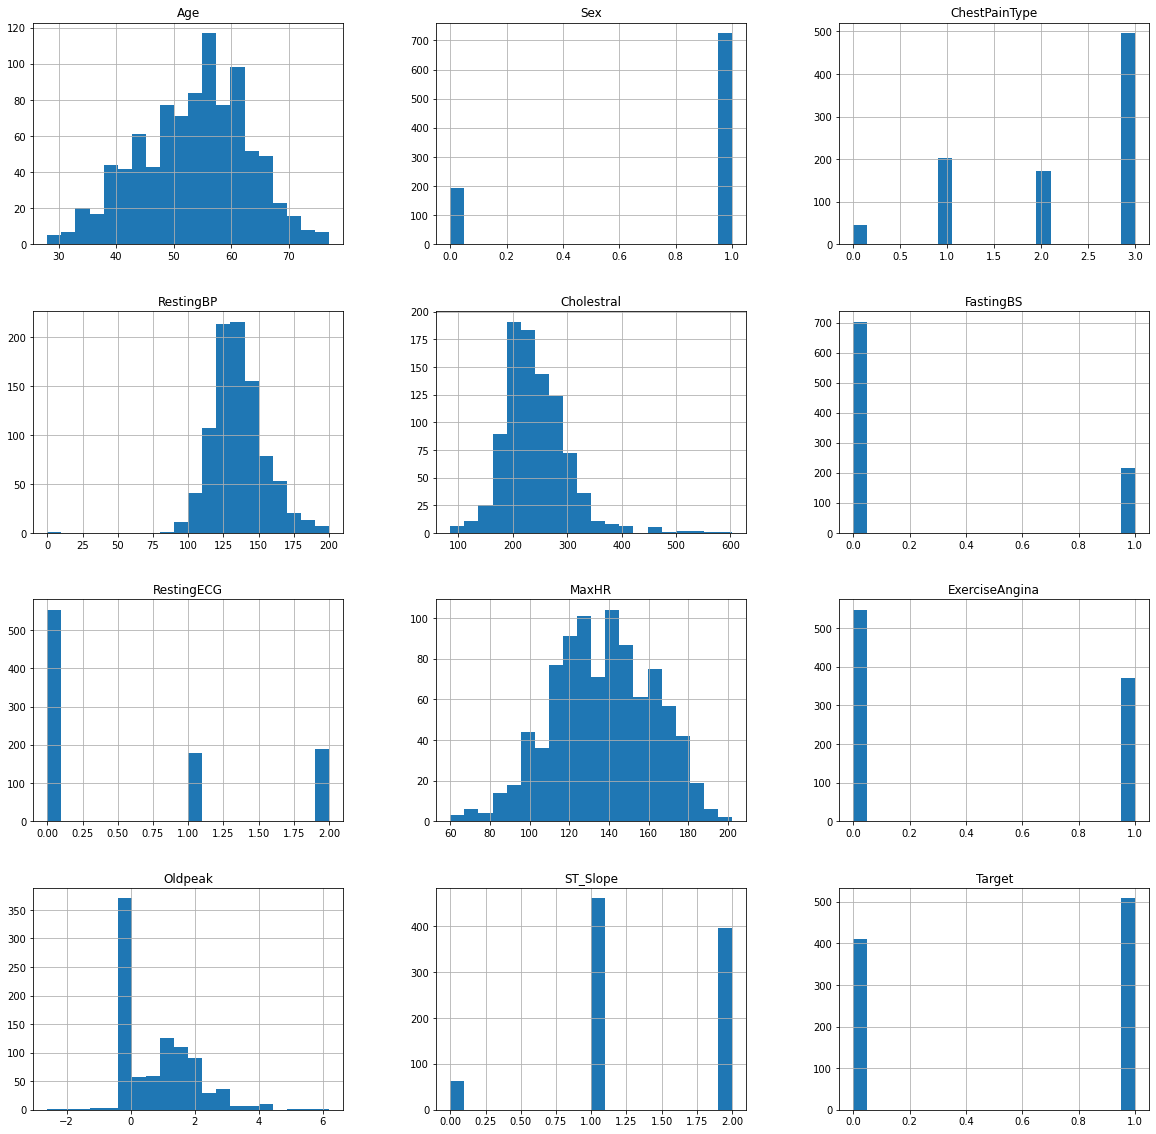

In [7]:
heart_dataset.hist(bins=20,figsize=(20,20))  # Plotting the different features of dataset on histogram
plt.show()

In [8]:
# Dividing the dataset into X and Y
X=heart_dataset.drop(columns='Target',axis=1) # X storing all the elements   
Y=heart_dataset['Target'] # Y storing the target or output of the dataset
X=X.to_numpy()
Y=Y.to_numpy()

In [9]:
print(X)
print(Y)

[[40.   1.   2.  ...  0.   0.   2. ]
 [49.   0.   1.  ...  0.   1.   1. ]
 [37.   1.   2.  ...  0.   0.   2. ]
 ...
 [57.   1.   3.  ...  1.   1.2  1. ]
 [57.   0.   2.  ...  0.   0.   1. ]
 [38.   1.   1.  ...  0.   0.   2. ]]
[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1

In [10]:
# Splitting the dataset into test set and traininset set using train_test_slpit function
# test_size defines splitting the dataset into what proportion 0.2 significance divide the dataest in the ration of 80% and 20%
# Here 80% for training and 00% for testing 
# stratify is used to split the data in stratified fashion.
# random_state used to control the shuffling applied to the data before applying the split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2) 
print(X.shape, X_train.shape, X_test.shape)

(918, 11) (734, 11) (184, 11)


In [11]:
print(X_train)

[[49.   1.   1.  ...  0.   2.   1. ]
 [44.   1.   2.  ...  0.   1.   1. ]
 [51.   1.   3.  ...  1.   4.2  1. ]
 ...
 [43.   1.   3.  ...  0.   1.5  0. ]
 [62.   1.   1.  ...  0.   1.8  1. ]
 [50.   1.   3.  ...  1.   1.1  1. ]]


In [12]:
# Now Adding target data With X_train Data so Model predict well with X_test data
X_train = np.insert(X_train, 11, Y_train, axis=1)
print(X_train)

[[49.   1.   1.  ...  2.   1.   1. ]
 [44.   1.   2.  ...  1.   1.   0. ]
 [51.   1.   3.  ...  4.2  1.   1. ]
 ...
 [43.   1.   3.  ...  1.5  0.   1. ]
 [62.   1.   1.  ...  1.8  1.   0. ]
 [50.   1.   3.  ...  1.1  1.   1. ]]


In [13]:
X_train.shape

(734, 12)

In [14]:
print(X_train[:,11])

[1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.

### Model Training: KNN Classifier (Using Manhattan Distance) 

In [15]:
# we would be using Manhattan distance method for finding the nearest neighbor
classifier = KNN_Classifier(distance_metric='Manhattan')

In [16]:
# Calling our prediction method
predicition = classifier.predict(X_train, X_test[1], k=5)


In [17]:
X_test.shape

(184, 11)

In [18]:
X_test_size=X_test.shape[0]
print(X_test_size)

184


In [19]:
y_pred=[]
for i in range(X_test_size):
  predicition=classifier.predict(X_train,X_test[i],k=5)
  y_pred.append(predicition)

In [20]:
print(y_pred)

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]


**Model Evalution**

In [21]:
# Calculating the Accuracy Score of out KNN model
accuracy=accuracy_score(Y_test,y_pred)
print(accuracy*100,"%")

61.41304347826087 %


### KNN Classifier in SKlearn

In [22]:
X=heart_dataset.drop(columns='Target',axis=1)
Y=heart_dataset['Target']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [24]:
classifier=KNeighborsClassifier(p=1) # p=1 means Mannhattan distance and p=2 means Euclidean distance
classifier.fit(X_train, Y_train) # fitting our dataset 

KNeighborsClassifier(p=1)

In [25]:
y_pred=classifier.predict(X_test)
accuracy=accuracy_score(Y_test,y_pred)
print(accuracy*100,"%")

64.67391304347827 %


### Conclusion

We have seen the implementation of K-Nearest Neighbors Classifier from Scratch. We came to a conclusion that our model has an accuracy of **61.41%** compared to model present in SKLearn whose accuracy prediction was **64.67%** which is quit good. We have taken a small dataset for good baseline and easy to explain. 